In [2]:
using DifferentialEquations


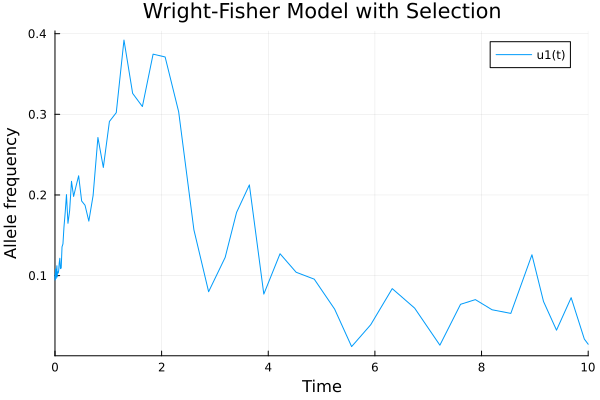

In [43]:

# Drift function (deterministic term)
function drift(u, p, t)
    s, N = p
    return s * u * (1 - u)
end

# Diffusion function (stochastic term)
function diffusion(u, p, t)
    s, N = p
    return sqrt(abs(u * (1 - u)) / N)
end

# Initial allele frequency
u0 = 0.1  # Example initial condition

# Parameters: selection coefficient 's' and population size 'N'
p = (s = 0.1, N = 10)  # Example parameters

# Time span for the simulation
tspan = (0.0, 10.0)  # From time 0 to 10

# Define the SDE problem
sde_problem = SDEProblem(drift, diffusion, u0, tspan, p)


# Define the condition for the callback: when the allele frequency is close to 0 or 1
function condition(u, t, integrator)
    threshold = 1e-3  # Set a threshold close to 0 and 1
    return (u[1] < threshold || u[1] > 1-threshold) ? true : false
end

# Define the affect! function for the callback: set the allele frequency to 0 or 1
function affect!(integrator)
    if integrator.u < 0.5
        integrator.u = 0.0
    else
        integrator.u = 1.0
    end
end

# Create the DiscreteCallback
callback = DiscreteCallback(condition, affect!)

# Define the initial conditions, parameters, and SDE problem as before

# Solve the SDE problem with the callback
sol = solve(sde_problem, SRIW1(), callback=callback)

# Analyze the results
using Plots
plot(sol, xlabel="Time", ylabel="Allele frequency", title="Wright-Fisher Model with Selection")
